# A repository to explore the evolution of sex in nematodes 

In this file, we are going to explore how a parasite will effect the evolution of hermaphrodism in *C. elegans*. Here we assume the virulence of parasite is density-dependant, rather than being fixed. 

In [229]:
# Simulating the effect of a parasite with matching allele mechanism
  library('SciViews')
  library ( 'ggplot2')

  inffreq = 0 # Frequency of infected individuals 
  uninffreq = 1 # Frequency of uninfected individuals 
  p = 0.001 # Frequency of recombination

## Carrying capacity in sexual and asexual populations 
Here, we assume that resources limit the population size, instead of space. 

Under standart terminology, let *b* be the number of offspring produced by females in absence of any intraspecific competition. Let *d* be the death rate following reproduction. Now, let *a* represent the sensivity of birth rate to density, so that the actual Birth rate, *B*, is equal to: *b-aN*, where *N* is the number of hosts competing for resources in the relevant patch. Similarly, let *c* represent the sensivity of death rate to density, so that the actual Death rate, *D* is equal to: *d-cN*. Note that *D* is constrained to be less than or equal to one. 



The recursion equation for the number of individuals at time *t + 1*, as a function of Nt is:
$$
  N_{t+1} = N_{t} + BN_{t} - DN_{t} 
$$
The change in population size is calculated as: 
$$ 
 N_{t+1} - N_{t} = BN_{t} - DN_{t}
$$
The equilibrium density, Kasex, is thus attained when B=D. Hence as reviewed by Gotelli (1995), the carrying capacity is 
$$
  K_{asex} = \frac {b-d} {a+c}
$$
Using this value for Kasex, eqn 1 can be converted into the more familiar form of the discrete-time logistic equation:
$$
  N_{t+1} = N_{t} + rN_{t} ( 1 - \frac {N_{t}} {K_{asex}}) 
$$

where *r = b–d*. This formulation assumes that all individuals are reproducing (e.g. asexual). For a dioecious (orgonochoric) population, however, males are not directly producing offspring. Hence the calculation for equilibrium in a sexual population is attained when *(1– s)B = D*, where s is the frequency of males in the population. It is easy to show that the carrying capacity for a sexual population, Ksex, is equal to:
$$
    K_{sex} = \frac{(1-s)b - d} {(1-s)a + c}
$$
Clearly, an asexual population would have a higher carrying capacity.

I constructed a computer-simulation model to determine the outcome of competition between sexual, asexual, and Hermaphrodite nematodes in the presence of potentially coevolving parasites. I  assumed two loci in a haploid host population, with three alleles at both loci (giving nine possible genotypes).
Infection by parasites required that parasites match the host at both loci, which is the standard assumption for the matching alleles model for infection (Frank, 1993; Otto & Michalakis, 1998; Agrawal & Lively, 2002). 

In [230]:
# predicting a
  r1 = ln (291)/ (90/24) #intrinsic rate of natural increase in low density 
  r2 = ln (191)/ (90/24) #intrinsic rate of natural increase in high density
  au = (r1-r2) / 10000  #au is a constant that gives the sensitivity of uninfected host to total population density 
  ai = au*1.1 #ai is a constant that gives the sensitivity of infected host to total population density 
  
  # Setting population dynamics parameters 
  d = 1 # d is the death rate.  Here I set d=1, meaning an annual species.
  bu = 2.37 # b is the number of offspring produced by a single  uninfected female (sexual, asexual, or hermaphrodite)
  bi = 2.2 # b is the number of offspring produced by a single  infected female (sexual, asexual, or hermaphrodite)
  c = 0  # c is a constant that gives the sensitivity of the death rate to density.  Here set = 0.
 

## A mathematical model for the mating system of C. elegans

We first develop a general mathematical model for the C. elegans mating system that will be useful in suggesting and interpreting subsequent experiments. Consider a worm population consisting of H hermaphrodites and M males; the population frequencies of hermaphrodites P and males S are given by
$$
    P = \frac {H}{H + M}, S = \frac {M}{H + M}
$$
Furthermore, we denote the average number of fertilized eggs per hermaphrodite by h and the average number of fertilizing sperm per male by m. An important model parameter will be the mating efficiency
$$
    b = m/h
$$
As a consequence of selfing, the total number of fertilizing male sperm mM is less than or equal to the total number of fertilized eggs hH, so that $ bS/P < 1$

A deterministic model is constructed for the evolution of the frequency of males in the population under the usual simplifying assumptions of very large population size and discrete generations. We assume that one-half the offspring from male-fertilized eggs and a fraction $u$ from self-fertilized eggs are male.

Mating table for C. elegans 

| Mating              | No. of zygotes   | Frequency   | Male progeny frequency  | Hermaphrodite  progeny frequency  |
| :-----------------: | :--------------: | :---------: | :---------------------: | :--------------------------------:|
| Selfing             |         hH - mM  |   $1 - bS/P$| $(1-u)(1-bS/P)$         | $u(1-bS/P)$                       |
| Cross-fertilization |            mM    |    $bS/P$   | $bS/2P$                 | $bS/2P$                           |

Assuming the sex ratio is in equilibrium, Hermaphrodite progeny frequency will be equal to Hermaphrodite parent frequency. Assuming $bS/P = m$, we will have: 
$$
     H = u(1-m) +  \frac{m}{2} = \frac {2u - 2um + m}{2}
$$

In [231]:
# C. elegans mating dynamic
  B = 0.06 #  the mating efficiency
  S = 0.00077 # the population frequencie of males
  m = B*(S/(1-S)) #fractions of non-selfing hermaphrodite
  u = 0.00075 #fraction of males produced via selfing 

In [232]:
ssex = 1/2 # ssex is the frequency of males in the sexual subpopulation.  (1-ssex) gives the freq of females in sexual population 
sherm = (2*u - (2*u*m) + m)/2 # sherm is the frequency of males in the hermaphrodite subpopulation.  (1-sherm) gives the freq of females in hermaphrodite population 

In [233]:
# anayltical solutions: carrying capacities for sexual and asexuals are set by the parameters given above
  Ksex = round (((1-ssex)*(bi*inffreq + bu * uninffreq) - d)/((1-ssex)*(ai*inffreq + au * uninffreq) + c)) #solution for carrying capacity of sexual population
  Kherm = round(((1-sherm)*(bi*inffreq + bu * uninffreq)-d)/((1-sherm)*(ai*inffreq + au * uninffreq) + c)) #solution for carrying capacity of hermaphrodite population
  Kasex = round(((bi*inffreq + bu * uninffreq)-d) / ((ai*inffreq + au * uninffreq) + c)) #solution for carrying capacity of asexual population

In [234]:
k_frame <- data.frame (

    Population = c("Asexual", "Sexual", "Hermaphrodite"),
    Carrying_capacity = c(Kasex, Ksex, Kherm)
    
)
k_frame

Population,Carrying_capacity
Asexual,122016
Sexual,32953
Hermaphrodite,121948


In [235]:
# initial conditions.  Sex initiated at Ksex.  Asex at 0.
  Sex = Ksex 
  Asex = 0
  Herm = 0 

In [236]:
# setting introduction time of Hermaphrodite, Asexual, parasite 
  Gherm = 500  #generation at which a single hermaphrodite female is introduced
  Gasex = 600 #generation at which a single asexual female is introduced
  Gpara = 1
     

In [237]:
  # setting number of generartions in each simulation 
  T = 6000 # T is the number of time steps in addition to time step 0
  time = c(1:T)  #sets up do loop for i = 1 to T

In [238]:
# setting number of loci that shooukd match for infection 
numlocus = 2 # number of loci 
numallele = 3 # number of alleles at each loci

Througout this notebook, we assume alleles frequencies in different host population are independant and can take any random number between 0 and 1. Also, alleles frequencies in parasite population are independant from that of host populations. 

In [239]:
# frequencies of allele in sexual population 
  f1sex = c(0.2, 0.4, 0.4) # frequencies of allele in first locus
  f2sex = c(0.6, 0.2, 0.2) # frequencies of allele in second locus
  
  # setting genotype frequencies in Sexual host population
  HostSexGenSpace = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial sexual host population
  for (rows in 1:nrow(HostSexGenSpace)) {
    
    for (columns in 1:ncol(HostSexGenSpace)) {
      
      HostSexGenSpace [rows, columns] = f1sex[rows] * f2sex[columns] * Sex
      
    }
  }
  # introducing matrices of infection 
  HostSexGenSpaceInf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial infected sexual host population 
  HostSexGenSpaceUninf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial uninfected sexual host population
  print ("Numbers of every genotypes in the  initial sexual host population:") 
  
alelle_sex_frame <- data.frame (

    "X" = c("A1","A2","A3"), 
    B1 = HostSexGenSpace [,1], 
    B2 = HostSexGenSpace [,2], 
    B3 = HostSexGenSpace[,3]
    
)
alelle_sex_frame

[1] "Numbers of every genotypes in the  initial sexual host population:"


X,B1,B2,B3
A1,3954.36,1318.12,1318.12
A2,7908.72,2636.24,2636.24
A3,7908.72,2636.24,2636.24


In [240]:
# frequencies of allele in hermaphrodite population 
  f1herm = c(0.3, 0.3, 0.4) 
  f2herm = c(0.4, 0.2, 0.4)
  
  
  # setting genotype frequencies in hermaphrodite host population
  HostHermGenSpace = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial hermaphrodite host population
  for (rows in 1:nrow(HostHermGenSpace)) {
    
    for (columns in 1:ncol(HostHermGenSpace)) {
      
      HostHermGenSpace [rows, columns] = f1herm[rows] * f2herm[columns] * 2
      
    }
  }
  
  # introducing matrices of infection 
  HostHermGenSpaceInf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial infected hermaphrodite host population 
  HostHermGenSpaceUninf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial uninfected hermaphrodite host population 
  print ("Frequencies of every genotypes in the  initial hermaphrodite host population:") 
alelle_herm_frame <- data.frame (

    "X" = c("A1","A2","A3"), 
    B1 = HostHermGenSpace [,1], 
    B2 = HostHermGenSpace [,2], 
    B3 = HostHermGenSpace[,3]
    
)
alelle_herm_frame

[1] "Frequencies of every genotypes in the  initial hermaphrodite host population:"


X,B1,B2,B3
A1,0.24,0.12,0.24
A2,0.24,0.12,0.24
A3,0.32,0.16,0.32


In [241]:
# frequencies of allele in asexual population 
  f1asex = c(0.2, 0.4, 0.4) # frequencies of allele in first locus
  f2asex = c(0.6, 0.2, 0.2) # frequencies of allele in second locus
  
  # setting genotype frequencies in aSexual host population
  HostAsexGenSpace = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial asexual host population
  for (rows in 1:nrow(HostAsexGenSpace)) {
    
    for (columns in 1:ncol(HostAsexGenSpace)) {
      
      HostAsexGenSpace [rows, columns] = f1asex[rows] * f2asex[columns] * 50000
      
    }
  }
  # introducing matrices of infection 
  HostAsexGenSpaceInf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the initial infected Asexual host population
  HostAsexGenSpaceUninf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the initial uninfected Asexual host population
  print ("Numbers of every genotypes in the  initial asexual host population:") 
  alelle_asex_frame <- data.frame (

    "X" = c("A1","A2","A3"), 
    B1 = HostAsexGenSpace [,1], 
    B2 = HostAsexGenSpace [,2], 
    B3 = HostAsexGenSpace[,3]
    
)
alelle_asex_frame

[1] "Numbers of every genotypes in the  initial asexual host population:"


X,B1,B2,B3
A1,6000,2000,2000
A2,12000,4000,4000
A3,12000,4000,4000


In [242]:
 #frequencies of allele in parasite population 
  f1para = c(0.2, 0.4, 0.4) 
  f2para = c(0.6, 0.2, 0.2)
  
  
  # setting genotype frequencies in parasite population
  ParasiteGenSpace = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the initial parasite population 
  
  for (rows in 1:nrow(ParasiteGenSpace)) {
    
    for (columns in 1:ncol(ParasiteGenSpace)) {
      
      ParasiteGenSpace [rows, columns] = f1para[rows] * f2para[columns] 
      
    }
  }
  print ("Frequencies of every genotypes in the  parasite population:") 
  alelle_para_frame <- data.frame (

    "X" = c("A1","A2","A3"), 
    B1 = ParasiteGenSpace [,1], 
    B2 = ParasiteGenSpace [,2], 
    B3 = ParasiteGenSpace[,3]
    
)
alelle_para_frame

[1] "Frequencies of every genotypes in the  parasite population:"


X,B1,B2,B3
A1,0.12,0.04,0.04
A2,0.24,0.08,0.08
A3,0.24,0.08,0.08


We start with a population of Sexual Host occupying the environment. Then introduce parasite into environment. Following that, a sunpopulation of Hermaphrodites emerge. Lastly, A asexual subpopulation will be introduced. 

In [243]:
 # initial conditions.  SexHost initiated at Ksex.  AsexHost at 0. HermHost at 0.
  SexHost = Sex 
  AsexHost = 0
  HermHost = 0

  # initial conditions.  Para initiated at 0.  
  Para = 0

In [244]:
# introducing vectors 
  outSexHost = vector()  # outSexHost vector
  outSexHost[1]=SexHost[1]

  outHermHost = vector() # outHermHost vector
  outHermHost[1] = AsexHost[1]

  outAsexHost = vector()  # outAsexHost  vector
  outAsexHost[1]=AsexHost[1]

  outPara = vector()  # outPara vector
  outPara[1]=Para[1]

We ill use the discrete-time logistic equation for host populations as follows:
$$
  N_{t+1} = N_{t} + rN_{t} ( 1 - \frac {N_{asex} + N_{sex} + N_{Herm}} {K_{asex}}) 
$$

$$
    N_{t+1} = N_{t} + rN_{t} ( 1 - \frac {N_{asex} + N_{sex} + N_{Herm}} {K_{sex}})
$$


$$
    N_{t+1} = N_{t} + rN_{t} ( 1 - \frac {N_{asex} + N_{sex} + N_{Herm}} {K_{herm}})
$$

But, since there will be an infection in the environment, reproduction of infected and uninfected individuals ill differ, as well as there sensivity to the total population. 
Under these assumptions, the recursion for the number of asexual individuals with genotype ij at time t + 1 is: 

$$
    A_{ij}' = A_{ij(I)} ( b_{(I)} - a_{(I)} N_t) + A_{ij(U)} (b_{(U)} - a_{(U)} N_t )
$$

Similarly, the recursion for the number of sexual individuals with genotype ij at t + 1, assuming no recombination between resistance loci, is:
$$
    S_{ij}' = (1-s_{sex})(S_{ij(I)} ( b_{(I)} - a_{(I)} N_t) + S_{ij(U)} (b_{(U)} - a_{(U)} N_t ))
$$
The equation for hermaphrodite population will be the same. 
$$
    H_{ij}' = (1-s_{herm})(H_{ij(I)} ( b_{(I)} - a_{(I)} N_t) + H_{ij(U)} (b_{(U)} - a_{(U)} N_t ))
$$
If there is recombination between loci, the number of sexual individuals of each genotype, after accounting for recombination is:
$$
    S_{ij}'' = (1- \rho) S_{ij}' + \frac {\rho S_i S_j}{\sum (S_{ij})}
$$
This will be the same for Hermaphrodite population: 
$$
    H_{ij}'' = (1- \rho) H_{ij}' + \frac {\rho H_i H_j}{\sum (H_{ij})}
$$
Finally, I used the standard assumption that the probability of infection for each host genotype depends on the frequency of the matching genotype in the parasite population. Hence, we get: 
$$
    S_{ij(I)}' =  S_{ij}'' P_{ij}, and S_{ij(U)}' =  S_{ij}'' (1- P_{ij})
$$
Similarly, the number of infected and uninfected asexual individuals at time t is:
$$
    A_{ij(I)}' =  A_{ij}'' P_{ij}, and A_{ij(U)}' =  A_{ij}'' (1- P_{ij})
$$
And for Hermaphrodite population it will be: 
$$
    H_{ij(I)}' =  H_{ij}'' P_{ij}, and H_{ij(U)}' =  H_{ij}'' (1- P_{ij})
$$
The frequencies of alleles in parasite population change in accodrance with how the change in host population. 

In [245]:
  # calculation of abundance through generations 
  for(i in 1: T) {
    if (i >= Gpara) {
      
      Para[i] = 2 # setting initial parasite population 
      
    } else  {
      
      Para[i] = 0
      
    }
    if(i == Gherm)
    {
      
      HermHost[i] =  2 #  setting initial hermaphrodite population 
    
    }
    if (is.na(HermHost[i])){
      
      HermHost[i] = 0
      
    }
    if(i == Gasex)
    {
      
      AsexHost[i] =  50000 #  setting initial hermaphrodite population 
      
    }
    if (is.na(AsexHost[i])){
      
      AsexHost[i] = 0
      
    }
    
    SumInfHerm = 0
    SumInfSex = 0 
    SumInfAsex = 0 
    
    # Sexual Host 
    outSexHost[i] = SexHost[i]
    NHostSexGenSpace = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies in next generation 
    HostSexGenSpaceRecom = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies after recombination 
    THostSexGenSpace = matrix(nrow = numallele, ncol = numallele) # temporary matrices for genotypes frequencies of host in each generation
    fHostSexGenSpace = matrix(nrow = numallele, ncol = numallele) # relative genotypes frequencies 
    
    
    # calculating relative genotypes frequencies 
     for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
       
        fHostSexGenSpace[rows, columns] = HostSexGenSpace[rows, columns] / SexHost[i]
        
      }
    }
    
  
    
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
       
       # calculating genotypes frequencies after recombination  
        frows = (fHostSexGenSpace[rows, 1] + fHostSexGenSpace[rows, 2] + fHostSexGenSpace[rows, 3]) 
        fcolumns = (fHostSexGenSpace[1, columns] + fHostSexGenSpace[2, columns] + fHostSexGenSpace[3, columns]) 
        HostSexGenSpaceRecom[rows, columns] = ((HostSexGenSpace[rows, columns] / SexHost[i]) * (1-p)) + (p * (frows * fcolumns))
        THostSexGenSpace[rows, columns] = HostSexGenSpaceRecom[rows, columns] * SexHost[i]
        if ( is.na(THostSexGenSpace[rows, columns])) {
          
          THostSexGenSpace[rows, columns] = 0 
          
        } 
        if( THostSexGenSpace[rows, columns] < 0 ) { 
         
          THostSexGenSpace[rows, columns] = 0   
          
        }
        # calculating  infection 
        if (Para[i] == 0) {
          
          HostSexGenSpaceInf[rows, columns] = 0
          HostSexGenSpaceUninf[rows, columns] = THostSexGenSpace[rows, columns]
          
        } else {
          
          HostSexGenSpaceInf[rows, columns] = THostSexGenSpace[rows, columns] * (ParasiteGenSpace[rows, columns])
          HostSexGenSpaceUninf[rows, columns] = THostSexGenSpace[rows, columns] * (1- (ParasiteGenSpace[rows, columns]) )

        }
        
        
        # calculating next generation genotypes frequencies 
        NHostSexGenSpace[rows, columns] =  (HostSexGenSpaceInf[rows, columns] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + (HostSexGenSpaceUninf [rows, columns] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
        THostSexGenSpace[rows, columns] = NHostSexGenSpace[rows, columns]
        if ( is.na(THostSexGenSpace[rows, columns])) {
          
          NHostSexGenSpace[rows, columns] = 0 
          THostSexGenSpace[rows, columns] = 0 
          
        } 
        if( THostSexGenSpace[rows, columns] < 0 ) { 
          
          NHostSexGenSpace[rows, columns] = 0 
          THostSexGenSpace[rows, columns] = 0   
          
        }
        
        # calculating next generation abundance 
        if ( is.na(SexHost[i+1])) {
          
          SexHost[i+1] = NHostSexGenSpace[rows, columns]
          
        } else {
          
          SexHost[i+1] = SexHost[i+1] + NHostSexGenSpace[rows, columns]
          
        }
      }
    }
    
    
    # calculating abundance of infecteds 
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        SumInfSex = SumInfSex + HostSexGenSpaceInf[rows, columns] 
        
      }
    }
    
    
    # calculating next generation frequencies in host population 
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {

        HostSexGenSpace[rows, columns] = THostSexGenSpace[rows, columns] 
        
      }
    }
    
    # setting a minimum abundance for host population 
    if ( SexHost[i] < 0.001) {
      
      SexHost[i+1] = 0
      
    }
    
  
    
    # Hermaphrodite Host 
    outHermHost[i] = HermHost[i]
    NHostHermGenSpace = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies in next generation 
    HostHermGenSpaceRecom = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies after recombination 
    THostHermGenSpace = matrix(nrow = numallele, ncol = numallele) # temporary matrices for genotypes frequencies of host in each generation
    fHostHermGenSpace = matrix(nrow = numallele, ncol = numallele) # relative genotypes frequencies
    
    
    
    if (HermHost[i] == 0){
      
      HermHost[i+1] = 0 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          HostHermGenSpaceInf[rows, columns] = 0
          HostHermGenSpaceUninf[rows, columns] = 0
          
        }
      }
    
    } else { 
      
      # calculating relative genotypes frequencies 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          fHostHermGenSpace[rows, columns] = HostHermGenSpace[rows, columns] / HermHost[i]
          
        }
      }
       
      for (rows in 1:nrow(NHostHermGenSpace)) {
        for (columns in 1:ncol(NHostHermGenSpace)) {
          
          # calculating genotypes frequencies after recombination  
          frows = (fHostHermGenSpace[rows, 1] + fHostHermGenSpace[rows, 2] + fHostHermGenSpace[rows, 3]) 
          fcolumns = (fHostHermGenSpace[1, columns] + fHostHermGenSpace[2, columns] + fHostHermGenSpace[3, columns])
          HostHermGenSpaceRecom[rows, columns] = ((HostHermGenSpace[rows, columns] / HermHost[i]) * (1-p)) + (p * (frows * fcolumns))
          THostHermGenSpace[rows, columns] = HostHermGenSpaceRecom[rows, columns] * HermHost[i]
          if ( is.na(THostHermGenSpace[rows, columns])) {
            
            THostHermGenSpace[rows, columns] = 0 
            
          }
          if( THostHermGenSpace[rows, columns] < 0 ) { 
            
            THostHermGenSpace[rows, columns] = 0   
            
          }
        
          # calculating  infection 
          if (Para[i] == 0) {
          
            HostHermGenSpaceInf[rows, columns] = 0
            HostHermGenSpaceUninf[rows, columns] = THostHermGenSpace[rows, columns]
          
          } else {
          
            HostHermGenSpaceInf[rows, columns] = THostHermGenSpace[rows, columns] * (ParasiteGenSpace[rows, columns])
            HostHermGenSpaceUninf[rows, columns] = THostHermGenSpace[rows, columns] * (1- (ParasiteGenSpace[rows, columns]) )
            
          }
        
          # calculating next generation genotypes frequencies 
          NHostHermGenSpace[rows, columns] =  (HostHermGenSpaceInf[rows, columns] * (1 - sherm) * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + (HostHermGenSpaceUninf [rows, columns] * (1 - sherm) * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))
          THostHermGenSpace[rows, columns] = NHostHermGenSpace[rows, columns]
          if ( is.na(THostHermGenSpace[rows, columns])) {
            
            NHostHermGenSpace[rows, columns] = 0 
            THostHermGenSpace[rows, columns] = 0 
            
          }
          if( THostHermGenSpace[rows, columns] < 0 ) { 
            
            NHostHermGenSpace[rows, columns] = 0 
            THostHermGenSpace[rows, columns] = 0   
            
          }
          
          # calculating next generation abundance 
          if ( is.na(HermHost[i+1])) {
          
            HermHost[i+1] = NHostHermGenSpace[rows, columns]
          
          } else {
          
            HermHost[i+1] = HermHost[i+1] + NHostHermGenSpace[rows, columns]
          
          }
        }
      }
      
      # calculating abundance of infecteds 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          SumInfHerm = SumInfHerm + HostHermGenSpaceInf[rows, columns] 
          
        }
      }
      
      
      #calculating next generation frequencies in host population 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          HostHermGenSpace[rows, columns] = THostHermGenSpace[rows, columns] 
          
        }
      }
      
      # setting a minimum abundance for host population 
      if ( HermHost[i] < 0.001) {
        
        HermHost[i+1] = 0
        
      }
    }
    
    
    # Asexual Host 
    outAsexHost[i] = AsexHost[i]
    NHostAsexGenSpace = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies in next generation 
    HostAsexGenSpaceRecom = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies after recombination 
    THostAsexGenSpace = matrix(nrow = numallele, ncol = numallele) # temporary matrices for genotypes frequencies of host in each generation
    fHostAsexGenSpace = matrix(nrow = numallele, ncol = numallele) # relative genotypes frequencies
    
    
    
    if (AsexHost[i] == 0){
      
      AsexHost[i+1] = 0 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          HostAsexGenSpaceInf[rows, columns] = 0
          HostAsexGenSpaceUninf[rows, columns] = 0
          
        }
      }
      
    } else { 
      # calculating relative genotypes frequencies 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          fHostAsexGenSpace[rows, columns] = HostAsexGenSpace[rows, columns] / AsexHost[i]

        }
      }
    
      
      for (rows in 1:nrow(NHostAsexGenSpace)) {
        for (columns in 1:ncol(NHostAsexGenSpace)) {
          
         
          THostAsexGenSpace[rows, columns] = fHostAsexGenSpace[rows, columns] * AsexHost[i]
          if ( is.na(THostAsexGenSpace[rows, columns])) {
            
            THostAsexGenSpace[rows, columns] = 0 
            
          }
          if(THostAsexGenSpace[rows, columns]< 0 ) { 
            
            THostAsexGenSpace[rows, columns] = 0   
            
          }
          
          # calculating  infection 
          if (Para[i] == 0) {
            
            HostAsexGenSpaceInf[rows, columns] = 0
            HostAsexGenSpaceUninf[rows, columns] = THostAsexGenSpace[rows, columns]
            
          } else {
            
            HostAsexGenSpaceInf[rows, columns] = THostAsexGenSpace[rows, columns] * (ParasiteGenSpace[rows, columns])
            HostAsexGenSpaceUninf[rows, columns] = THostAsexGenSpace[rows, columns] * (1- (ParasiteGenSpace[rows, columns]) )
            
          }
          
          # calculating next generation genotypes frequencies 
          NHostAsexGenSpace[rows, columns] =  (HostAsexGenSpaceInf[rows, columns] * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + (HostAsexGenSpaceUninf [rows, columns] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))
          THostAsexGenSpace[rows, columns] = NHostAsexGenSpace[rows, columns]
          if ( is.na(THostAsexGenSpace[rows, columns])) {
            
            NHostAsexGenSpace[rows, columns] = 0 
            THostAsexGenSpace[rows, columns] = 0 
            
          }
          if( THostAsexGenSpace[rows, columns] < 0 ) { 
            
            NHostAsexGenSpace[rows, columns] = 0 
            THostAsexGenSpace[rows, columns] = 0   
            
          }
          
          # calculating next generation abundance 
          if ( is.na(AsexHost[i+1])) {
            
            AsexHost[i+1] = NHostAsexGenSpace[rows, columns]
            
          } else {
            
            AsexHost[i+1] = AsexHost[i+1] + NHostAsexGenSpace[rows, columns]
            
          }
        }
      }
      
      # calculating abundance of infecteds 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          SumInfAsex = SumInfAsex + HostAsexGenSpaceInf[rows, columns] 
          
        }
      }
      
      
      #calculating next generation frequencies in host population 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          HostAsexGenSpace[rows, columns] = THostAsexGenSpace[rows, columns] 
          
        }
      }
      
      # setting a minimum abundance for host population 
      if ( AsexHost[i] < 0.001) {
        
        AsexHost[i+1] = 0
        
      }
    }
     
    # calculating next generation frequencies in parasite population 
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        if ( i > Gpara){ 
          
          ParasiteGenSpace [rows, columns] =  (HostSexGenSpaceInf[rows, columns]+ HostHermGenSpaceInf[rows, columns] + HostAsexGenSpaceInf[rows, columns] ) / (SumInfSex + SumInfHerm + SumInfAsex )
          
        }
      }
    }
  }

Warning message:
"Removed 15000 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_text)."

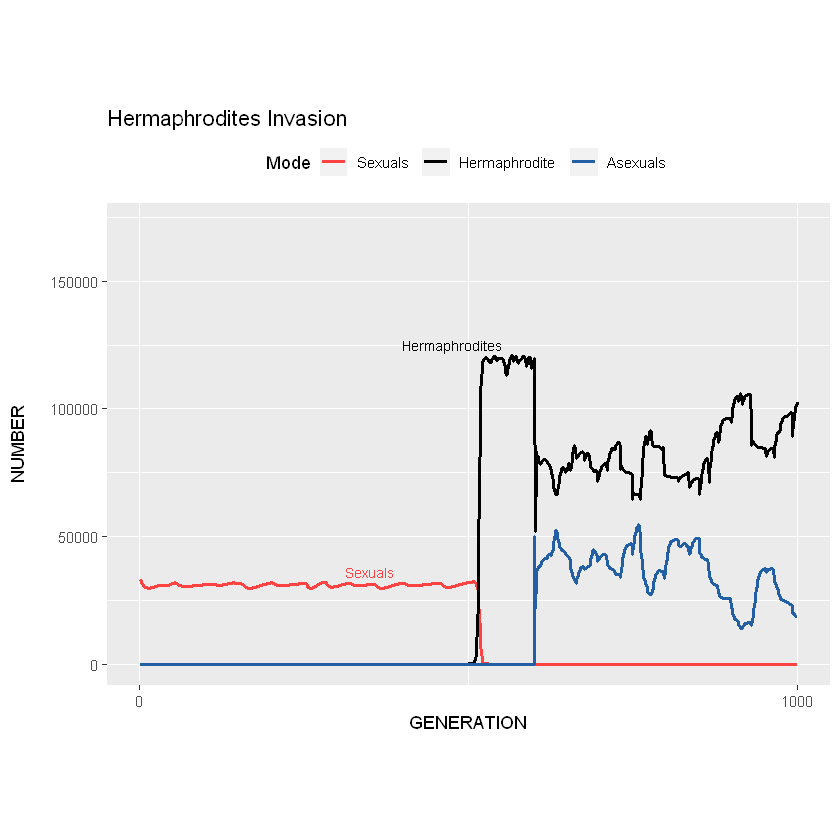

In [246]:
#using ggplot2 to plot Sexual, Asexual, and Hermaphrodite hosts through generations 
  Fig13 <- data.frame("Generation" = time, "Number" = outSexHost, "Mode" = rep("Sexuals", length(outSexHost)))
  Fig13s1 <- data.frame("Generation" = time, "Number" = outHermHost, "Mode" = rep("Hermaphrodite", length(outHermHost)))
  Fig13s2 <- data.frame("Generation" = time, "Number" = outAsexHost, "Mode" = rep("Asexuals", length(outAsexHost)))
  Fig13 <- rbind(Fig13, Fig13s1, Fig13s2 )
  
  ggplot(Fig13, aes(x=Generation, y=Number, color=Mode)) +
    geom_line(size=1) +
    scale_x_continuous(name="GENERATION",  limits =c(0, 1000), breaks=seq(0, 5000, 1000)) + 
    scale_y_continuous(name="NUMBER\n", limits = c(0, Kherm+50000)) +
    scale_color_manual(values = c(Sexuals = "#FF4242", Hermaphrodite = "#000000", Asexuals = "#235FA4"))  +
    annotate(geom = "text", x= 1500, y = 30000, label = "Asexuals", color = "#235FA4", size = 3) +
    annotate(geom = "text", x= 350, y = 36000, label = "Sexuals", color = "#FF4242", size = 3) +
    annotate(geom = "text", x= 475, y = 125000, label = "Hermaphrodites", color = "#000000", size = 3) +
    theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
    ggtitle(label = 'Hermaphrodites Invasion')
   

## Multiple Simulations

Up untill now, we have rune one simulation. As demonstrated above, Asexual population will go exticnt, even if it start at half of Kherm. Now, we will do 50 simulations and check statical parameters of these simulations. Through each simulation, the starting frequency of alleles in all population will be chosen separately and randomly. 

In [66]:
# number of simulations 
N = 50

maxSex = vector ()
maxAsex = vector()
maxHerm = vector()

lastSex = vector()
lastAsex = vector()
lastHerm = vector()

In [247]:
for ( z in 1:N) { 
  # frequencies of allele in sexual population 
  allele11 = runif(1)
  allele12 = runif(1)
  allele13 = runif(1)
  Sumallele1 = allele11 + allele12 + allele13
  f1sex = c((allele11 / Sumallele1), (allele12 / Sumallele1), (allele13 / Sumallele1)) # frequencies of allele in first locus  
  allele21 = runif(1)
  allele22 = runif(1)
  allele23 = runif(1)
  Sumallele2 = allele21 + allele22 + allele23
  f1sex = c((allele21 / Sumallele2), (allele22 / Sumallele2), (allele23 / Sumallele2)) # frequencies of allele in second locus
  
  # setting genotype frequencies in Sexual host population
  HostSexGenSpace = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial sexual host population
  for (rows in 1:nrow(HostSexGenSpace)) {
    
    for (columns in 1:ncol(HostSexGenSpace)) {
      
      HostSexGenSpace [rows, columns] = f1sex[rows] * f2sex[columns] * Sex
      
    }
  }
  # introducing matrices of infection 
  HostSexGenSpaceInf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial infected sexual host population 
  HostSexGenSpaceUninf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial uninfected sexual host population
  
  
  # frequencies of allele in hermaphrodite population 
  allele11 = runif(1)
  allele12 = runif(1)
  allele13 = runif(1)
  Sumallele1 = allele11 + allele12 + allele13
  f1herm = c((allele11 / Sumallele1), (allele12 / Sumallele1), (allele13 / Sumallele1)) 
  allele21 = runif(1)
  allele22 = runif(1)
  allele23 = runif(1)    
  Sumallele2 = allele21 + allele22 + allele23
  f2herm = c((allele21 / Sumallele2), (allele22 / Sumallele2), (allele23 / Sumallele2))
  
  
  # setting genotype frequencies in hermaphrodite host population
  HostHermGenSpace = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial hermaphrodite host population
  for (rows in 1:nrow(HostHermGenSpace)) {
    
    for (columns in 1:ncol(HostHermGenSpace)) {
      
      HostHermGenSpace [rows, columns] = f1herm[rows] * f2herm[columns] * 2
      
    }
  }
  
  # introducing matrices of infection 
  HostHermGenSpaceInf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial infected hermaphrodite host population 
  HostHermGenSpaceUninf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial uninfected hermaphrodite host population 
  
  
  # frequencies of allele in asexual population 
  allele11 = runif(1)
  allele12 = runif(1)
  allele13 = runif(1)
  Sumallele1 = allele11 + allele12 + allele13
  f1asex = c((allele11 / Sumallele1), (allele12 / Sumallele1), (allele13 / Sumallele1)) # frequencies of allele in first locus
  allele21 = runif(1)
  allele22 = runif(1)
  allele23 = runif(1)    
  Sumallele2 = allele21 + allele22 + allele23
  f2asex = c((allele21 / Sumallele2), (allele22 / Sumallele2), (allele23 / Sumallele2)) # frequencies of allele in second locus
  
  # setting genotype frequencies in aSexual host population
  HostAsexGenSpace = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the  initial asexual host population
  for (rows in 1:nrow(HostAsexGenSpace)) {
    
    for (columns in 1:ncol(HostAsexGenSpace)) {
      
      HostAsexGenSpace [rows, columns] = f1asex[rows] * f2asex[columns] * 50000
      
    }
  }
  # introducing matrices of infection 
  HostAsexGenSpaceInf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the initial infected Asexual host population
  HostAsexGenSpaceUninf = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the initial uninfected Asexual host population 
  
  
  #frequencies of allele in parasite population 
  allele11 = runif(1)
  allele12 = runif(1)
  allele13 = runif(1)
  Sumallele1 = allele11 + allele12 + allele13
  f1para = c((allele11 / Sumallele1), (allele12 / Sumallele1), (allele13 / Sumallele1)) 
  allele21 = runif(1)
  allele22 = runif(1)
  allele23 = runif(1)    
  Sumallele2 = allele21 + allele22 + allele23
  f2para = c((allele11 / Sumallele1), (allele12 / Sumallele1), (allele13 / Sumallele1))
  
  
  # setting genotype frequencies in parasite population
  ParasiteGenSpace = matrix(nrow = numallele, ncol = numallele) # shows Numbers of every genotypes in the initial parasite population 
  
  for (rows in 1:nrow(ParasiteGenSpace)) {
    
    for (columns in 1:ncol(ParasiteGenSpace)) {
      
      ParasiteGenSpace [rows, columns] = f1para[rows] * f2para[columns] 
      
    }
  }
  
  # initial conditions.  SexHost initiated at Ksex.  AsexHost at 0. HermHost at 0.
  SexHost = Sex 
  AsexHost = 0
  HermHost = 0
  
  # initial conditions.  Para initiated at 0.  
  Para = 0
  
  # introducing vectors 
  outSexHost = vector()  # outSexHost vector
  outSexHost[1]=SexHost[1]
  
  outHermHost = vector() # outHermHost vector
  outHermHost[1] = AsexHost[1]
  
  outAsexHost = vector()  # outAsexHost  vector
  outAsexHost[1]=AsexHost[1]
  
  outPara = vector()  # outPara vector
  outPara[1]=Para[1]
  
  
  
  # calculation of abundance through generations 
  for(i in 1: T) {
    if (i >= Gpara) {
      
      Para[i] = 2 # setting initial parasite population 
      
    } else  {
      
      Para[i] = 0
      
    }
    if(i == Gherm)
    {
      
      HermHost[i] =  2 #  setting initial hermaphrodite population 
      
    }
    if (is.na(HermHost[i])){
      
      HermHost[i] = 0
      
    }
    if(i == Gasex)
    {
      
      AsexHost[i] =  50000 #  setting initial hermaphrodite population 
      
    }
    if (is.na(AsexHost[i])){
      
      AsexHost[i] = 0
      
    }
    cInfGenspace = matrix(nrow = numallele, ncol = numallele)
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        if ( i > Gpara){ 
          
          cInfGenspace [rows, columns] =  (HostSexGenSpaceInf[rows, columns]+ HostHermGenSpaceInf[rows, columns] + HostAsexGenSpaceInf[rows, columns] ) / (SumInfSex + SumInfHerm + SumInfAsex )
          
        } else { 
          
          cInfGenspace [rows, columns] = ParasiteGenSpace[rows, columns]
        }
      }
    }
    SumInfHerm = 0
    SumInfSex = 0 
    SumInfAsex = 0 
    
    # Sexual Host 
    outSexHost[i] = SexHost[i]
    NHostSexGenSpace = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies in next generation 
    HostSexGenSpaceRecom = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies after recombination 
    THostSexGenSpace = matrix(nrow = numallele, ncol = numallele) # temporary matrices for genotypes frequencies of host in each generation
    fHostSexGenSpace = matrix(nrow = numallele, ncol = numallele) # relative genotypes frequencies 
    
    
    # calculating relative genotypes frequencies 
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        fHostSexGenSpace[rows, columns] = HostSexGenSpace[rows, columns] / SexHost[i]
        
      }
    }
    
    
    
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        # calculating genotypes frequencies after recombination  
        frows = (fHostSexGenSpace[rows, 1] + fHostSexGenSpace[rows, 2] + fHostSexGenSpace[rows, 3]) 
        fcolumns = (fHostSexGenSpace[1, columns] + fHostSexGenSpace[2, columns] + fHostSexGenSpace[3, columns]) 
        HostSexGenSpaceRecom[rows, columns] = ((HostSexGenSpace[rows, columns] / SexHost[i]) * (1-p)) + (p * (frows * fcolumns))
        THostSexGenSpace[rows, columns] = HostSexGenSpaceRecom[rows, columns] * SexHost[i]
        if ( is.na(THostSexGenSpace[rows, columns])) {
          
          THostSexGenSpace[rows, columns] = 0 
          
        } 
        if( THostSexGenSpace[rows, columns] < 0 ) { 
          
          THostSexGenSpace[rows, columns] = 0   
          
        }
        # calculating  infection 
        if (Para[i] == 0) {
          
          HostSexGenSpaceInf[rows, columns] = 0
          HostSexGenSpaceUninf[rows, columns] = THostSexGenSpace[rows, columns]
          
        } else {
          
          HostSexGenSpaceInf[rows, columns] = THostSexGenSpace[rows, columns] * (ParasiteGenSpace[rows, columns])
          HostSexGenSpaceUninf[rows, columns] = THostSexGenSpace[rows, columns] * (1- (ParasiteGenSpace[rows, columns]) )
          
        }
        
        
        # calculating next generation genotypes frequencies 
        NHostSexGenSpace[rows, columns] =  (HostSexGenSpaceInf[rows, columns] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + (HostSexGenSpaceUninf [rows, columns] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
        THostSexGenSpace[rows, columns] = NHostSexGenSpace[rows, columns]
        if ( is.na(THostSexGenSpace[rows, columns])) {
          
          NHostSexGenSpace[rows, columns] = 0 
          THostSexGenSpace[rows, columns] = 0 
          
        } 
        if( THostSexGenSpace[rows, columns] < 0 ) { 
          
          NHostSexGenSpace[rows, columns] = 0 
          THostSexGenSpace[rows, columns] = 0   
          
        }
        
        # calculating next generation abundance 
        if ( is.na(SexHost[i+1])) {
          
          SexHost[i+1] = NHostSexGenSpace[rows, columns]
          
        } else {
          
          SexHost[i+1] = SexHost[i+1] + NHostSexGenSpace[rows, columns]
          
        }
      }
    }
    
    
    # calculating abundance of infecteds 
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        SumInfSex = SumInfSex + HostSexGenSpaceInf[rows, columns] 
        
      }
    }
    
    
    # calculating next generation frequencies in host population 
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        HostSexGenSpace[rows, columns] = THostSexGenSpace[rows, columns] 
        
      }
    }
    
    # setting a minimum abundance for host population 
    if ( SexHost[i] < 0.001) {
      
      SexHost[i+1] = 0
      
    }
    
    
    
    # Hermaphrodite Host 
    outHermHost[i] = HermHost[i]
    NHostHermGenSpace = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies in next generation 
    HostHermGenSpaceRecom = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies after recombination 
    THostHermGenSpace = matrix(nrow = numallele, ncol = numallele) # temporary matrices for genotypes frequencies of host in each generation
    fHostHermGenSpace = matrix(nrow = numallele, ncol = numallele) # relative genotypes frequencies
    
    
    
    if (HermHost[i] == 0){
      
      HermHost[i+1] = 0 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          HostHermGenSpaceInf[rows, columns] = 0
          HostHermGenSpaceUninf[rows, columns] = 0
          
        }
      }
      
    } else { 
      
      # calculating relative genotypes frequencies 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          fHostHermGenSpace[rows, columns] = HostHermGenSpace[rows, columns] / HermHost[i]
          
        }
      }
      
      for (rows in 1:nrow(NHostHermGenSpace)) {
        for (columns in 1:ncol(NHostHermGenSpace)) {
          
          # calculating genotypes frequencies after recombination  
          frows = (fHostHermGenSpace[rows, 1] + fHostHermGenSpace[rows, 2] + fHostHermGenSpace[rows, 3]) 
          fcolumns = (fHostHermGenSpace[1, columns] + fHostHermGenSpace[2, columns] + fHostHermGenSpace[3, columns])
          HostHermGenSpaceRecom[rows, columns] = ((HostHermGenSpace[rows, columns] / HermHost[i]) * (1-p)) + (p * (frows * fcolumns))
          THostHermGenSpace[rows, columns] = HostHermGenSpaceRecom[rows, columns] * HermHost[i]
          if ( is.na(THostHermGenSpace[rows, columns])) {
            
            THostHermGenSpace[rows, columns] = 0 
            
          }
          if( THostHermGenSpace[rows, columns] < 0 ) { 
            
            THostHermGenSpace[rows, columns] = 0   
            
          }
          
          # calculating  infection 
          if (Para[i] == 0) {
            
            HostHermGenSpaceInf[rows, columns] = 0
            HostHermGenSpaceUninf[rows, columns] = THostHermGenSpace[rows, columns]
            
          } else {
            
            HostHermGenSpaceInf[rows, columns] = THostHermGenSpace[rows, columns] * (ParasiteGenSpace[rows, columns])
            HostHermGenSpaceUninf[rows, columns] = THostHermGenSpace[rows, columns] * (1- (ParasiteGenSpace[rows, columns]) )
            
          }
          
          # calculating next generation genotypes frequencies 
          NHostHermGenSpace[rows, columns] =  (HostHermGenSpaceInf[rows, columns] * (1 - sherm) * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + (HostHermGenSpaceUninf [rows, columns] * (1 - sherm) * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))
          THostHermGenSpace[rows, columns] = NHostHermGenSpace[rows, columns]
          if ( is.na(THostHermGenSpace[rows, columns])) {
            
            NHostHermGenSpace[rows, columns] = 0 
            THostHermGenSpace[rows, columns] = 0 
            
          }
          if( THostHermGenSpace[rows, columns] < 0 ) { 
            
            NHostHermGenSpace[rows, columns] = 0 
            THostHermGenSpace[rows, columns] = 0   
            
          }
          
          # calculating next generation abundance 
          if ( is.na(HermHost[i+1])) {
            
            HermHost[i+1] = NHostHermGenSpace[rows, columns]
            
          } else {
            
            HermHost[i+1] = HermHost[i+1] + NHostHermGenSpace[rows, columns]
            
          }
        }
      }
      
      # calculating abundance of infecteds 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          SumInfHerm = SumInfHerm + HostHermGenSpaceInf[rows, columns] 
          
        }
      }
      
      
      #calculating next generation frequencies in host population 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          HostHermGenSpace[rows, columns] = THostHermGenSpace[rows, columns] 
          
        }
      }
      
      # setting a minimum abundance for host population 
      if ( HermHost[i] < 0.001) {
        
        HermHost[i+1] = 0
        
      }
    }
    
    
    # Asexual Host 
    outAsexHost[i] = AsexHost[i]
    NHostAsexGenSpace = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies in next generation 
    HostAsexGenSpaceRecom = matrix(nrow = numallele, ncol = numallele) # genotypes frequencies after recombination 
    THostAsexGenSpace = matrix(nrow = numallele, ncol = numallele) # temporary matrices for genotypes frequencies of host in each generation
    fHostAsexGenSpace = matrix(nrow = numallele, ncol = numallele) # relative genotypes frequencies
    
    
    
    if (AsexHost[i] == 0){
      
      AsexHost[i+1] = 0 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          HostAsexGenSpaceInf[rows, columns] = 0
          HostAsexGenSpaceUninf[rows, columns] = 0
          
        }
      }
      
    } else { 
      # calculating relative genotypes frequencies 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          fHostAsexGenSpace[rows, columns] = HostAsexGenSpace[rows, columns] / AsexHost[i]
          
        }
      }
      
      
      for (rows in 1:nrow(NHostAsexGenSpace)) {
        for (columns in 1:ncol(NHostAsexGenSpace)) {
          
          
          THostAsexGenSpace[rows, columns] = fHostAsexGenSpace[rows, columns] * AsexHost[i]
          if ( is.na(THostAsexGenSpace[rows, columns])) {
            
            THostAsexGenSpace[rows, columns] = 0 
            
          }
          if(THostAsexGenSpace[rows, columns]< 0 ) { 
            
            THostAsexGenSpace[rows, columns] = 0   
            
          }
          
          # calculating  infection 
          if (Para[i] == 0) {
            
            HostAsexGenSpaceInf[rows, columns] = 0
            HostAsexGenSpaceUninf[rows, columns] = THostAsexGenSpace[rows, columns]
            
          } else {
            
            HostAsexGenSpaceInf[rows, columns] = THostAsexGenSpace[rows, columns] * (ParasiteGenSpace[rows, columns])
            HostAsexGenSpaceUninf[rows, columns] = THostAsexGenSpace[rows, columns] * (1- (ParasiteGenSpace[rows, columns]) )
            
          }
          
          # calculating next generation genotypes frequencies 
          NHostAsexGenSpace[rows, columns] =  (HostAsexGenSpaceInf[rows, columns] * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + (HostAsexGenSpaceUninf [rows, columns] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))
          THostAsexGenSpace[rows, columns] = NHostAsexGenSpace[rows, columns]
          if ( is.na(THostAsexGenSpace[rows, columns])) {
            
            NHostAsexGenSpace[rows, columns] = 0 
            THostAsexGenSpace[rows, columns] = 0 
            
          }
          if( THostAsexGenSpace[rows, columns] < 0 ) { 
            
            NHostAsexGenSpace[rows, columns] = 0 
            THostAsexGenSpace[rows, columns] = 0   
            
          }
          
          # calculating next generation abundance 
          if ( is.na(AsexHost[i+1])) {
            
            AsexHost[i+1] = NHostAsexGenSpace[rows, columns]
            
          } else {
            
            AsexHost[i+1] = AsexHost[i+1] + NHostAsexGenSpace[rows, columns]
            
          }
        }
      }
      
      # calculating abundance of infecteds 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          SumInfAsex = SumInfAsex + HostAsexGenSpaceInf[rows, columns] 
          
        }
      }
      
      
      #calculating next generation frequencies in host population 
      for (rows in 1:nrow(NHostSexGenSpace)) {
        for (columns in 1:ncol(NHostSexGenSpace)) {
          
          HostAsexGenSpace[rows, columns] = THostAsexGenSpace[rows, columns] 
          
        }
      }
      
      # setting a minimum abundance for host population 
      if ( AsexHost[i] < 0.001) {
        
        AsexHost[i+1] = 0
        
      }
    }
   
    
    # calculating next generation frequencies in parasite population 
    NInfGenspace = matrix(nrow = numallele, ncol = numallele)
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        if ( i > Gpara){ 
          
          ParasiteGenSpace [rows, columns] =  ParasiteGenSpace [rows, columns] + (NInfGenspace [rows, columns] - cInfGenspace [rows, columns])          
        }
      }
    }
    
    # calculating next generation frequencies in parasite population 
    for (rows in 1:nrow(NHostSexGenSpace)) {
      for (columns in 1:ncol(NHostSexGenSpace)) {
        
        if ( i > Gpara){ 
          
          ParasiteGenSpace [rows, columns] =  (HostSexGenSpaceInf[rows, columns]+ HostHermGenSpaceInf[rows, columns] + HostAsexGenSpaceInf[rows, columns] ) / (SumInfSex + SumInfHerm + SumInfAsex )
          
        }
      }
    }
  }


 maxSex[z] = max(outSexHost)
 maxAsex[z] = max(outAsexHost) 
 maxHerm[z] = max(outHermHost)  

 lastHerm[z] = outHermHost[T] 
 lastAsex[z] = outAsexHost[T]
 lastSex[z] = outSexHost[T]
}

In [248]:
# Create a data frame
Data_Frame <- data.frame (
  Abundance_of_Sexual_Host = lastSex,
  Abundance_of_Asexual_Host = lastAsex,
  Abundance_of_Hermaphrodite_Host = lastHerm,
  Maximum_of_Sexual_Host = maxSex, 
  Maximum_of_Asexual_Host = maxAsex, 
  Maximum_of_Hermaphrodite_Host = maxHerm
)

Data_Frame

Abundance_of_Sexual_Host,Abundance_of_Asexual_Host,Abundance_of_Hermaphrodite_Host,Maximum_of_Sexual_Host,Maximum_of_Asexual_Host,Maximum_of_Hermaphrodite_Host
0,0.008426577,120286.25,32953,86897.94,121941.6
0,0.000000000,121628.73,32953,76712.39,121947.1
0,0.000000000,121486.05,32953,107232.19,121944.2
0,0.000000000,118153.80,32953,67413.82,121944.3
0,0.000000000,121187.68,32953,52348.03,121945.0
0,0.000000000,97983.97,32953,75315.05,121944.0
0,0.000000000,117552.11,32953,80984.73,121942.4
0,0.000000000,121544.43,32953,50000.00,121943.7
0,0.000000000,121272.61,32953,64760.27,121944.6
0,0.000000000,121841.47,32953,66915.66,121944.8


In [249]:
Stat_Frame <- data.frame ( 

  Mean_Sexual_Host = mean(lastSex),
  SD_Sexual_Host = sd(lastSex), 
  CI_Sexual_Host = sd(lastSex) / sqrt(length(lastSex)),
  CV_Sexual_Host = (sd(lastSex) / mean(lastSex)) * 100, 
  Mean_Asexual_Host = mean(lastAsex), 
  SD_Asexual_Host = sd(lastAsex), 
  CI_Asexual_Host = sd(lastAsex) / sqrt(length(lastAsex)),
  CV_Asexual_Host = (sd(lastAsex) / mean(lastAsex)) * 100,
  Mean_Hermaphrodite_Host = mean(lastHerm),
  SD_Hermaphrodite_Host = sd(lastHerm), 
  CI_Hermaphrodite_Host = sd(lastHerm) / sqrt(length(lastHerm)), 
  CV_Hermaphrodite_Host = (sd(lastHerm) / mean(lastHerm)) * 100

)

In [250]:
Stat_Frame

Mean_Sexual_Host,SD_Sexual_Host,CI_Sexual_Host,CV_Sexual_Host,Mean_Asexual_Host,SD_Asexual_Host,CI_Asexual_Host,CV_Asexual_Host,Mean_Hermaphrodite_Host,SD_Hermaphrodite_Host,CI_Hermaphrodite_Host,CV_Hermaphrodite_Host
0,0,0,NaN,0.003832338,0.02591011,0.003664243,676.0915,118538.5,5580.729,789.2343,4.707946
